In [72]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sn
!pwd

/home/matt/dsi_galvanize/capstones/spotify/notebooks


In [2]:
tracks = pd.read_csv('../../capstone1/spotify_data/tracks.csv')
artists = pd.read_csv('../../capstone1/spotify_data/artists.csv')

/home/matt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


''

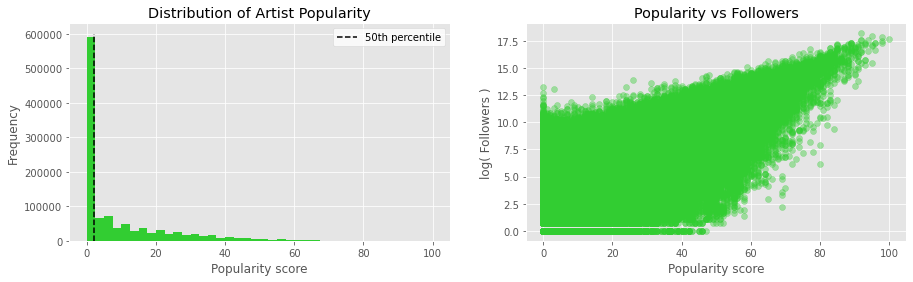

In [66]:
# Evaluate the popularity metric
fig, ax = plt.subplots(1,2, figsize=(15,4))

# Popularity distribution
ax[0].hist(artists['popularity'], bins=40, color='limegreen')
ax[0].vlines(artists['popularity'].quantile(0.5), 0, 600000, colors='black',linestyles='dashed', label='50th percentile')
ax[0].set_xlabel('Popularity score')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Distribution of Artist Popularity')
ax[0].legend(facecolor='white')

# Popularity vs followers
# followers = np.log(artists['followers'])
ax[1].scatter(artists['popularity'], np.log(artists['followers']), color='limegreen', alpha=0.4)
ax[1].set_xlabel('Popularity score')
ax[1].set_ylabel('log( Followers )')
ax[1].set_title('Popularity vs Followers')
plt.style.use('ggplot')
# fig.patch.set_facecolor('#282828ff')
plt.savefig('/home/matt/dsi_galvanize/capstones/spotify/img/popularity_metric_hist_scat.png',bbox_inches = "tight");
;

In [4]:
298616 /1104349 

0.2704000275275298

In [5]:
#Remove artists with no genre tags

genre_df = artists[artists['genres'] != '[]'].copy()
genre_df

,id,followers,genres,name,popularity
45,0VLMVnVbJyJ4oyZs2L3Yl2,71.0,['carnaval cadiz'],Las Viudas De Los Bisabuelos,6
46,0dt23bs4w8zx154C5xdVyl,63.0,['carnaval cadiz'],Los De Capuchinos,5
47,0pGhoB99qpEJEsBQxgaskQ,64.0,['carnaval cadiz'],Los “Pofesionales”,7
48,3HDrX2OtSuXLW5dLR85uN3,53.0,['carnaval cadiz'],Los Que No Paran De Rajar,6
136,22mLrN5fkppmuUPsHx6i2G,59.0,"['classical harp', 'harp']",Vera Dulova,3
...,...,...,...,...,...
1104328,1q9C5XlekzXbRLIuLCDTre,90087.0,"['social media pop', 'teen pop']",Brent Rivera,33
1104331,4fh2BIKYPFvXFsQLhaeVJp,309.0,['la indie'],Lone Kodiak,20
1104334,7akMsd2vb4xowNTehv3gsY,774.0,['indie rockism'],The Str!ke,0
1104336,35m7AJrUCtHYHyIUhCzmgi,205.0,['indie rockism'],Hunter Fraser,6


In [6]:
genre_df.groupby('genres').count().sort_values('id', ascending=True).head(500)

,id,followers,name,popularity
genres,,,,
"['dc hardcore', 'powerviolence', 'thrash core']",1,1,1,1
"['latin american heavy psych', 'mexican rock']",1,1,1,1
"['cumbia santafesina', 'folclor colombiano']",1,1,1,1
"['latin american heavy psych', 'monterrey indie']",1,1,1,1
"['cumbia santafesina', 'cumbia uruguaya']",1,1,1,1
...,...,...,...,...
"['crunk', 'memphis hip hop', 'phonk', 'underground hip hop']",1,1,1,1
"['crunk', 'memphis hip hop', 'trap']",1,1,1,1
"['crust punk', 'neo-crust', 'thrash core']",1,1,1,1


In [7]:
# Remove brackets from genre strings, then split by comma

genre_df['genres'] = genre_df.loc[:, 'genres'].str.strip("[]")
genre_split = genre_df.assign(genres=genre_df['genres'].str.split(', ')).explode('genres')
genre_split

,id,followers,genres,name,popularity
45,0VLMVnVbJyJ4oyZs2L3Yl2,71.0,'carnaval cadiz',Las Viudas De Los Bisabuelos,6
46,0dt23bs4w8zx154C5xdVyl,63.0,'carnaval cadiz',Los De Capuchinos,5
47,0pGhoB99qpEJEsBQxgaskQ,64.0,'carnaval cadiz',Los “Pofesionales”,7
48,3HDrX2OtSuXLW5dLR85uN3,53.0,'carnaval cadiz',Los Que No Paran De Rajar,6
136,22mLrN5fkppmuUPsHx6i2G,59.0,'classical harp',Vera Dulova,3
...,...,...,...,...,...
1104328,1q9C5XlekzXbRLIuLCDTre,90087.0,'teen pop',Brent Rivera,33
1104331,4fh2BIKYPFvXFsQLhaeVJp,309.0,'la indie',Lone Kodiak,20
1104334,7akMsd2vb4xowNTehv3gsY,774.0,'indie rockism',The Str!ke,0
1104336,35m7AJrUCtHYHyIUhCzmgi,205.0,'indie rockism',Hunter Fraser,6


In [8]:
# Create a new dataframe for genre counts

genre_count = genre_split.groupby('genres').count().copy()
genre_count['genre_count'] = genre_count['id']
genre_count = genre_count.reset_index()
genre_count = genre_count[['genres', 'genre_count']]
genre_count.sort_values('genre_count', ascending=False)

,genres,genre_count
1216,'dance pop',572
3910,'pop',568
4262,'rock',564
1585,'electro house',558
1049,'classical performance',502
...,...,...
3367,'musica puntana',3
3377,'musica timor-leste',2
2208,'himene tarava',2
3075,'mazandarani folk',2


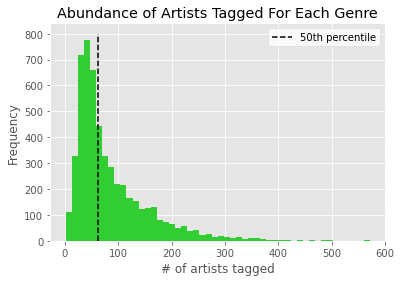

In [9]:
# How common are genres typically?

fig, ax = plt.subplots()
ax.hist(genre_count['genre_count'], bins=50, color='limegreen')
ax.set_xlabel('# of artists tagged')
ax.set_ylabel('Frequency')
ax.set_title('Abundance of Artists Tagged For Each Genre')
ax.vlines(genre_count['genre_count'].quantile(0.5), 0, 800, colors='black',linestyles='dashed', label='50th percentile')
ax.legend(facecolor='white')
plt.style.use('ggplot') 
plt.savefig('/home/matt/dsi_galvanize/capstones/spotify/img/genre_count_histogram.png',bbox_inches = "tight")

In [10]:
genre_count['genre_count'].max()

572

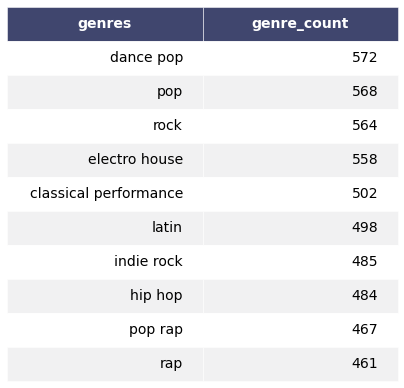

In [67]:
# What are the most popular genres?
top_10_genres = genre_count.sort_values('genre_count', ascending=False).head(10)
top_10_genres['genres'] = top_10_genres['genres'].str.strip("'")

top_10_genres

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

fig, ax = render_mpl_table(top_10_genres, header_columns=0, col_width=3.5)
plt.savefig('/home/matt/dsi_galvanize/capstones/spotify/img/top_10_genres_table.png')

In [12]:
# How many times are the top 10% of genres observed?
genre_count['genre_count'].describe()

count    5365.000000
mean       85.898043
std        71.625160
min         1.000000
25%        38.000000
50%        61.000000
75%       113.000000
max       572.000000
Name: genre_count, dtype: float64

In [13]:
# What's the average popularity score associated with each genre?
genre_popularity = genre_split.groupby('genres').mean().copy()
genre_popularity = genre_popularity.reset_index()

genre_popularity_sum = genre_split.groupby('genres').sum().copy()
genre_popularity_sum = genre_popularity_sum.reset_index()
genre_popularity_sum['popularity_sum'] = genre_popularity_sum['popularity']



genre_count_popularity = pd.merge(genre_count, genre_popularity)

genre_metrics = pd.merge(genre_count_popularity, genre_popularity_sum.loc[:,['genres','popularity_sum']])
genre_metrics

,genres,genre_count,followers,popularity,popularity_sum
0,"""australian children's music""",68,5071.323529,25.735294,1750
1,"""black 'n' roll""",44,19659.590909,16.863636,742
2,"""british children's music""",71,2066.647887,16.774648,1191
3,"""canadian children's music""",51,2772.392157,15.039216,767
4,"""canzone d'autore""",69,85357.362319,26.231884,1810
...,...,...,...,...,...
5360,'zouglou',127,3918.582677,13.157480,1671
5361,'zouk riddim',153,10106.555556,26.274510,4020
5362,'zouk',168,6666.601190,23.666667,3976
5363,'zurich indie',38,3234.157895,10.210526,388


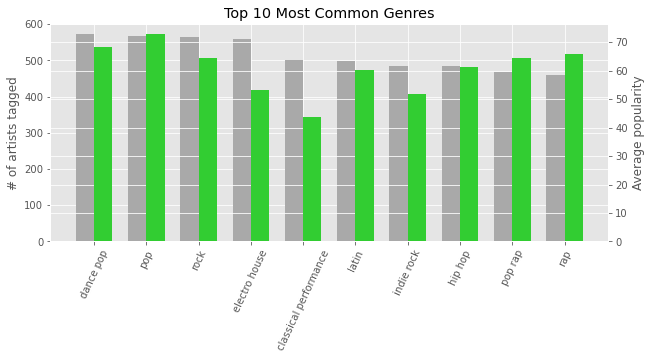

In [14]:
# How popular are the top 10 genres?

top_10_count_popularity = genre_count_popularity.sort_values('genre_count', ascending=False).head(10)

ind = np.arange(10)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,4))
ax2=ax.twinx()
rects1 = ax.bar(ind - width/2, top_10_count_popularity['genre_count'], width, color='darkgrey')
rects2 = ax2.bar(ind + width/2, top_10_count_popularity['popularity'], width, color='limegreen')

# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# of artists tagged')
ax2.set_ylabel('Average popularity')
ax.set_title('Top 10 Most Common Genres')
ax.set_xticks(ind)
ax.set_xticklabels(top_10_count_popularity['genres'].str.strip("'"), rotation=65)
plt.savefig('/home/matt/dsi_galvanize/capstones/spotify/img/top_10_genres_count_and_pop_bar.png',bbox_inches = "tight")

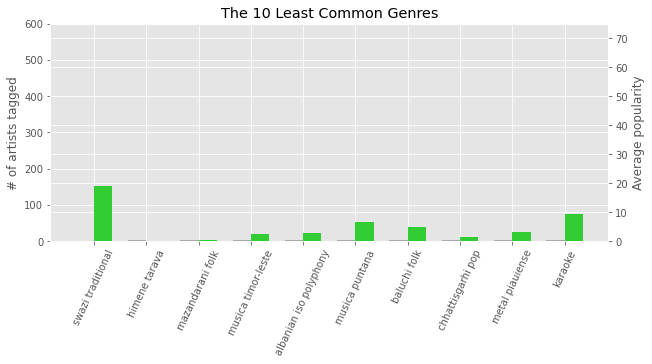

In [15]:
# How popular are the bottom 10 genres?

bottom_10_count_popularity = genre_count_popularity.sort_values('genre_count', ascending=True).head(10)


ind = np.arange(10)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,4))
ax2=ax.twinx()
rects1 = ax.bar(ind - width/2, bottom_10_count_popularity['genre_count'], width, color='darkgrey')
rects2 = ax2.bar(ind + width/2, bottom_10_count_popularity['popularity'], width, color='limegreen')

# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# of artists tagged')
ax.set_ylim(0,600)
ax2.set_ylim(0,75)
ax2.set_ylabel('Average popularity')
ax.set_title('The 10 Least Common Genres')
ax.set_xticks(ind)
ax.set_xticklabels(bottom_10_count_popularity['genres'].str.strip("'"), rotation=65)
plt.savefig('/home/matt/dsi_galvanize/capstones/spotify/img/bottom_10_genres_count_and_pop_bar.png', bbox_inches = "tight")

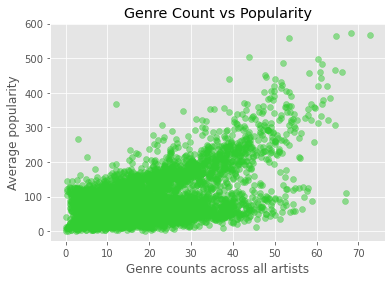

In [16]:
# Does genre count track with popularity?  

fig, ax = plt.subplots()
ax.scatter(genre_count_popularity['popularity'], genre_count_popularity['genre_count'], color='limegreen', alpha=0.5)
# ax.vlines(genre_count_popularity['popularity'].quantile(0.75), 0, 75, colors='black',linestyles='dashed', label='75th percentile')
ax.set_xlabel('Genre counts across all artists')
ax.set_ylabel('Average popularity')
ax.set_title('Genre Count vs Popularity')
# ax.legend(loc='lower right')
plt.savefig('/home/matt/dsi_galvanize/capstones/spotify/img/genre_count_popularity_scatter.png')

,genres,genre_count,followers,popularity,popularity_sum,demand
5241,'viral rap',63,3.853993e+05,56.396825,3553,0.895188
3102,'melodic rap',86,2.025855e+06,66.860465,5750,0.777447
2020,'girl group',64,7.916675e+05,49.031250,3138,0.766113
4095,'rap conciencia',62,2.648349e+05,46.741935,2898,0.753902
1217,'dance rock',69,6.293045e+05,51.913043,3582,0.752363
...,...,...,...,...,...,...
1374,'deep smooth r&b',129,1.166434e+02,0.775194,100,0.006009
2414,'indonesian indigenous',104,7.548077e+01,0.423077,44,0.004068
5229,'vintage swoon',122,1.198361e+01,0.434426,53,0.003561
5232,'vintage western',115,1.780000e+01,0.382609,44,0.003327


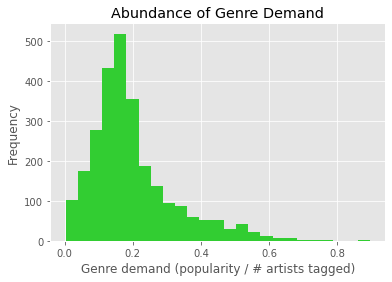

In [17]:
# Calculate a genre demand, as the ratio of genre_count to popularity
genre_metrics['demand'] = genre_metrics['popularity'] / genre_metrics['genre_count']
genre_metrics.sort_values('demand', ascending=False).head(50)

genre_metrics_clean = genre_metrics[(genre_metrics['popularity_sum'] != 0) & (genre_metrics['genre_count'] > 61)]
fig, ax = plt.subplots()
ax.hist(genre_metrics_clean['demand'], bins=25, color='limegreen')
ax.set_xlabel('Genre demand (popularity / # artists tagged)')
ax.set_ylabel('Frequency')
ax.set_title('Abundance of Genre Demand')
plt.savefig('/home/matt/dsi_galvanize/capstones/spotify/img/genre_demand_hist.png')
;

genre_metrics_clean.sort_values('demand', ascending=False)
# genre_metrics.sort_values('demand', ascending=False)

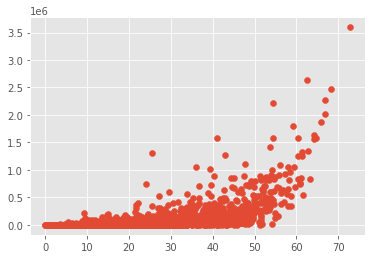

In [18]:
fig, ax = plt.subplots()
ax.scatter(genre_metrics['popularity'], genre_metrics['followers'])
# ax.set_xlim(0,10)
# ax.set_ylim(0,20)

In [19]:
genre_split[genre_split['name'] == "Bassnectar"]

,id,followers,genres,name,popularity
142881,1JPy5PsJtkhftfdr6saN2i,585113.0,'breakbeat',Bassnectar,62
142881,1JPy5PsJtkhftfdr6saN2i,585113.0,'brostep',Bassnectar,62
142881,1JPy5PsJtkhftfdr6saN2i,585113.0,'edm',Bassnectar,62
142881,1JPy5PsJtkhftfdr6saN2i,585113.0,'electro house',Bassnectar,62
142881,1JPy5PsJtkhftfdr6saN2i,585113.0,'electronic trap',Bassnectar,62
142881,1JPy5PsJtkhftfdr6saN2i,585113.0,'glitch hop',Bassnectar,62


In [20]:
# Merge genre metrics with full artists dataframe

genre_metrics['popularity_avg'] = genre_metrics['popularity']
genre_artists = pd.merge(genre_split, genre_metrics[['genres', 'genre_count', 'popularity_avg', 'demand']])

99.4221459369026

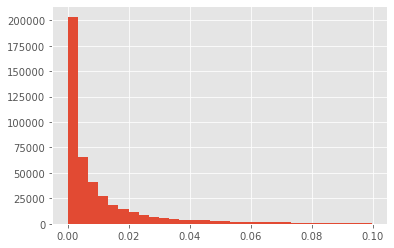

In [21]:
# Calculate "rising" metric, ratio of popularity to followers

genre_artists['rising'] = genre_artists['popularity'] / genre_artists['followers']
genre_artists_clean = genre_artists[(genre_artists['followers'] != 0) & (genre_artists['rising'] < 0.1)]

fig, ax = plt.subplots()
ax.hist(genre_artists_clean['rising'], bins=30)

genre_artists['demand'].quantile([0, 0.25, 0.5, 0.75, 0.95])

#inverse of quantile
stats.percentileofscore(genre_artists['demand'],1)

Crooked Colours is in the top 0.17% of rising artists 
Their 'indie soul' music is the most in-demand


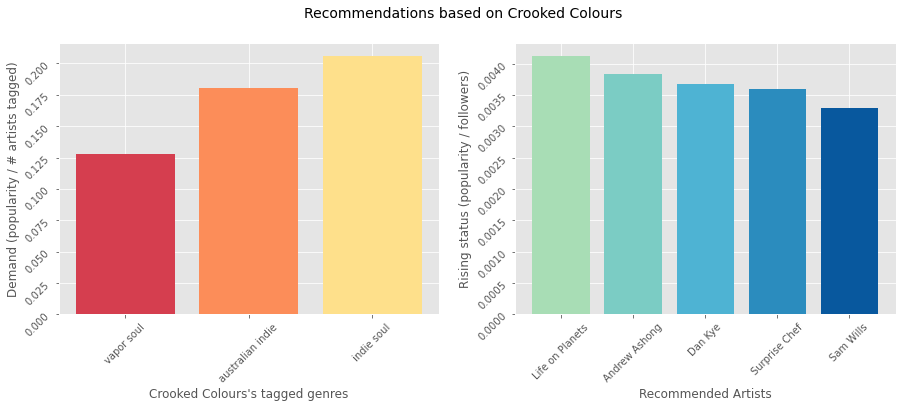

In [197]:
def genre_generator(artist,min_followers=10000):
    artist_profile = genre_artists[genre_artists['name'] == artist]
    demand = artist_profile.sort_values('demand', ascending=False)
    
    # find rising artists in the demand genre
    rising_demand = genre_artists[genre_artists['genres'] == (demand.iloc[0,2])].sort_values('rising', ascending=False)
    recs = rising_demand[rising_demand['followers'] > min_followers].head(5)

    # Plot artist genres
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    ax[0].bar(artist_profile['genres'].str.strip("'"), artist_profile['demand'], color=['#d53e4f','#fc8d59','#fee08b','#e6f598','#99d594','#3288bd'])
    ax[0].set_xlabel("{}'s tagged genres".format(artist))
    ax[0].set_ylabel('Demand (popularity / # artists tagged)')
    ax[0].tick_params(rotation=45)

    # Plot highest demand genre rising stars
    ax[1].bar(recs['name'], recs['rising'], color=['#a8ddb5','#7bccc4','#4eb3d3','#2b8cbe','#08589e'])
    ax[1].set_xlabel('Recommended Artists')
    ax[1].set_ylabel('Rising status (popularity / followers)')
    ax[1].tick_params(rotation=45)
    fig.suptitle("Recommendations based on {}".format(artist), fontsize=14)
    plt.savefig('/home/matt/dsi_galvanize/capstones/spotify/img/artist_recommender.png', bbox_inches = "tight")


    # Calculate rising star
    star = stats.percentileofscore(genre_artists['demand'], artist_profile.iloc[0, 8]) * 100
    print('{} is in the top {}% of rising artists \nTheir {} music is the most in-demand'.format(artist, round(star,2), demand.iloc[0,2]))


genre_generator('Crooked Colours')

In [23]:
genre_artists[genre_artists['name'] == 'Benjamin Blümchen']

,id,followers,genres,name,popularity,genre_count,popularity_avg,demand,rising
24434,1l6d0RIxTL3JytlLGvWzYe,79023.0,'hoerspiel',Benjamin Blümchen,76,178,32.230337,0.181069,0.000962


In [24]:
genre_artists[genre_artists['genres'] == "'austin americana'"].sort_values('rising', ascending=False).head(20)

,id,followers,genres,name,popularity,genre_count,popularity_avg,demand,rising
428991,1CSlVKKjwJ7h1yJSaLGLlz,25.0,'austin americana',John McDonough,26,41,21.195122,0.516954,1.040000
428988,1BsemFYB6Jnvzo2BQG2ntM,42.0,'austin americana',Marshall Anderson,2,41,21.195122,0.516954,0.047619
428977,2Ilw96AgJxhArKIpy3b1oY,128.0,'austin americana',Roxi Copland,6,41,21.195122,0.516954,0.046875
428980,7vHXZwdro0E7c2yswVVxpL,444.0,'austin americana',The Watters,12,41,21.195122,0.516954,0.027027
428969,0UFONazWMWbXd0Nlo2qEB1,252.0,'austin americana',Altamesa,6,41,21.195122,0.516954,0.023810
428968,6fELzqFudMVFmHRHnpaRDq,524.0,'austin americana',Percy Falls,12,41,21.195122,0.516954,0.022901
428971,1GaG01XcL520Q1SvovfbQC,752.0,'austin americana',Uncle Walt's Band,17,41,21.195122,0.516954,0.022606
428967,2TZOO6t9Bsn8KCPH8RXnlY,53.0,'austin americana',Ricky Stein,1,41,21.195122,0.516954,0.018868
428984,651GwyFbKSM1PRbRqFC2en,583.0,'austin americana',Ali Holder,11,41,21.195122,0.516954,0.018868
428997,1fvc00ooUl0WtqDzl1RR3b,1113.0,'austin americana',Jeff Plankenhorn,19,41,21.195122,0.516954,0.017071


In [25]:
# Artists can contain multiple values, which won't line up with the artists dataframe
# split into different entries, then remove brackets, then remove single quotes
# then merge... gonna be big
print(len(tracks))

tracks_artists = tracks.copy()
print(len(tracks_artists))

586672
586672


In [26]:
# split track artists into distinct rows

tracks_artists['artists'] = tracks_artists.loc[:, 'artists'].str.strip("[]")
tracks_split = tracks_artists.assign(artists=tracks_artists['artists'].str.split(', ')).explode('artists')
tracks_split['artists'] = tracks_split.loc[:, 'artists'].str.strip("'")
tracks_split.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,Uli,['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,Fernando Pessoa,['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,Dick Haymes,['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [27]:
# make a new column for genre_artists under 'artists' to match the tracks dataframe

genre_artists['artists'] = genre_artists['name']

In [28]:
data = genre_artists.merge(tracks_split, on='artists')

In [29]:
# this dataframe contains lots of duplicate and superflous data
# strip out columns of interest for initial assessment

print(len(data))
data.columns

2222219


Index(['id_x', 'followers', 'genres', 'name_x', 'popularity_x', 'genre_count',
       'popularity_avg', 'demand', 'rising', 'artists', 'id_y', 'name_y',
       'popularity_y', 'duration_ms', 'explicit', 'id_artists', 'release_date',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')

In [30]:
tracks_dates = data[['id_y','name_y','artists','release_date','popularity_y','genres','genre_count']].copy()

In [31]:
#

tracks_dates['release_date'] = pd.to_datetime(tracks_dates['release_date']).dt.to_period('Y')

In [32]:
# remove single quotes from genres
tracks_dates['genres'] = tracks_dates['genres'].str.strip("'")

In [34]:
indie_folk = tracks_dates[tracks_dates['genres']== 'indie folk']

In [35]:
indie_folk['release_date']

366643    2016
366644    2016
366645    2019
366646    2010
366647    2016
          ... 
679748    2014
679749    2014
679765    2008
679766    2012
679771    2014
Name: release_date, Length: 967, dtype: period[A-DEC]

In [36]:
# now that year and month tags are generated, group the tracks by release date
# and count them

indie_folk_monthly_counts = indie_folk.groupby('release_date').count().reset_index()
indie_folk_monthly_counts

,release_date,id_y,name_y,artists,popularity_y,genres,genre_count
0,1964,12,12,12,12,12,12
1,1969,9,9,9,9,9,9
2,1971,37,37,37,37,37,37
3,1972,13,13,13,13,13,13
4,1973,12,12,12,12,12,12
5,1975,13,13,13,13,13,13
6,1976,9,9,9,9,9,9
7,1978,10,10,10,10,10,10
8,1979,2,2,2,2,2,2
9,1981,1,1,1,1,1,1


In [37]:
indie_folk.groupby('release_date').count().reset_index().iloc[:, 0]

0     1964
1     1969
2     1971
3     1972
4     1973
5     1975
6     1976
7     1978
8     1979
9     1981
10    1984
11    1986
12    1987
13    1988
14    1990
15    1991
16    1992
17    1993
18    1994
19    1995
20    1996
21    1997
22    1998
23    1999
24    2000
25    2001
26    2002
27    2003
28    2004
29    2005
30    2006
31    2007
32    2008
33    2009
34    2010
35    2011
36    2012
37    2013
38    2014
39    2015
40    2016
41    2017
42    2018
43    2019
44    2020
45    2021
Name: release_date, dtype: period[A-DEC]

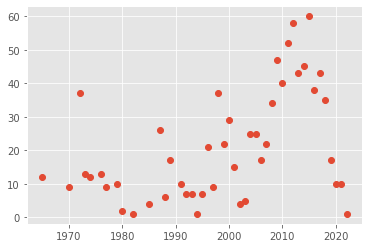

In [38]:
fig, ax = plt.subplots()
ax.plot_date(indie_folk_monthly_counts['release_date'], indie_folk_monthly_counts['name_y'])

In [39]:
# good start, now start mapping multiple genres on there -- starting with top 10 genres

def genre_timeline(genres):
    '''
    enter genres as a list of strings
    
    returns a stacked plot of release in each genre per year
    '''
    # generate the yearly counts for the genres
    genre_years = []
    genre_counts = []
    for genre in genres:
        genre_df = tracks_dates[tracks_dates['genres']== genre]
        genre_yearly = genre_df.groupby('release_date').count().reset_index()
        genre_years.append(genre_yearly.iloc[:,0])
        genre_counts.append(genre_yearly.iloc[:,1])
    
    # plot the genre count by year
    fig, ax = plt.subplots(figsize=(14,7))
    colorset = ['yellow','#1f78b4','mediumorchid','#33a02c','darkslategrey','#e31a1c','#fdbf6f']
    
    for i in range(7):
        ax.plot_date(genre_years[i], genre_counts[i], label=genres[i],color=colorset[i], alpha=0.9)
#         ax.set_facecolor('darkgrey')
        ax.legend(facecolor='white')
    ax.set_ylabel('Track count')
    ax.set_xlabel('Release year')
    ax.set_title('Tracks Release Dates By Genre Since 1922')
    plt.savefig('/home/matt/dsi_galvanize/capstones/spotify/img/top_10_genre_time_scatter.png', bbox_inches = "tight")
    #         facecolor='darkgrey'


In [40]:
top_10_genres = ['dance pop','pop','rock','electro house','classical performance','latin','indie rock','hip hop','pop rap','rap']

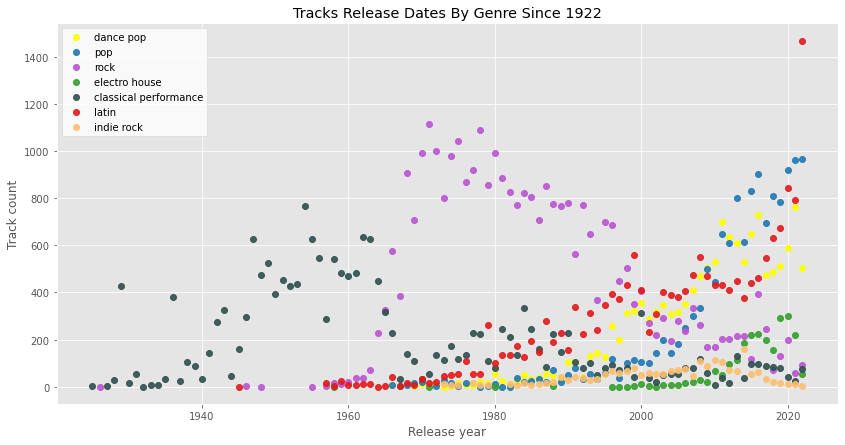

In [41]:
genre_timeline(top_10_genres);

In [98]:
features = data[['genres','artists', 'name_y',
       'popularity_y', 'release_date', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature']].copy()
features['genres'] = features['genres'].str.strip("'")
features

,genres,artists,name_y,popularity_y,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,carnaval cadiz,Agrupación Musical Ntra. Sra. De Los Reyes,La Saeta,40,2013-02-18,0.298,0.454,9,-8.342,0,0.0500,0.5910,0.700,0.3710,0.507,75.103,4
1,cornetas y tambores,Agrupación Musical Ntra. Sra. De Los Reyes,La Saeta,40,2013-02-18,0.298,0.454,9,-8.342,0,0.0500,0.5910,0.700,0.3710,0.507,75.103,4
2,carnaval cadiz,Los Rebujitos,Todos Los Besos,60,2010-03-10,0.667,0.763,9,-5.295,1,0.0331,0.3750,0.000,0.1180,0.733,125.049,4
3,carnaval cadiz,Los Rebujitos,Curvas Peligrosas,34,2004-03-10,0.780,0.949,4,-4.098,0,0.1430,0.0732,0.000,0.8520,0.779,97.487,4
4,carnaval cadiz,Los Rebujitos,Volar,54,2007-05-30,0.747,0.909,4,-5.664,0,0.1090,0.7700,0.000,0.0988,0.517,125.096,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222214,russian old school hip hop,Лигалайз & П13,Я знаю людей,28,2003-05-01,0.748,0.761,7,-6.230,0,0.1950,0.5090,0.000,0.2560,0.827,89.989,4
2222215,russian old school hip hop,Nonamerz,Еще один день,38,2005-09-01,0.578,0.603,11,-10.472,0,0.4190,0.2940,0.000,0.5010,0.470,174.454,4
2222216,antilliaanse folklore,Padu del Caribe,Aura Waltz,0,1953-01-01,0.583,0.566,0,-15.002,1,0.0476,0.9500,0.847,0.1090,0.932,124.095,4
2222217,suomisaundi,Aavepyora,Stone Age Economics & Space Age Tools - 2011 R...,2,2015-02-14,0.569,0.990,6,-11.705,1,0.0640,0.0367,0.706,0.0899,0.581,145.012,4


In [99]:
# run a test with a single genre, generate a distribution curve of each feature, then later
# stack the curves on top of each other? 

rock = features[features['genres'] == 'rock'].copy()
rock['release_date'] = pd.to_datetime(rock['release_date']).dt.to_period('Y')
rock

,genres,artists,name_y,popularity_y,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
129543,rock,Steel Panther,Community Property (Live),7,2017,0.353,0.748,3,-7.367,1,0.0542,0.010200,0.000001,0.6000,0.291,82.019,1
129544,rock,Steel Panther,"Poontang Boomerang - (Live At Wacken, 2018)",5,2019,0.527,0.867,10,-4.470,0,0.0445,0.003660,0.000000,0.6460,0.437,100.066,4
129545,rock,Steel Panther,Eyes Of A Panther,57,2009,0.380,0.961,5,-3.323,0,0.1430,0.000744,0.000000,0.0924,0.577,178.044,4
129546,rock,Steel Panther,Death To All But Metal,53,2009,0.396,0.960,8,-2.584,0,0.1270,0.000332,0.000000,0.1770,0.545,75.520,4
129547,rock,Steel Panther,Community Property,50,2009,0.438,0.689,3,-4.534,1,0.0302,0.042700,0.000000,0.1480,0.346,82.029,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164176,rock,Twenty One Pilots,Morph,67,2018,0.734,0.607,8,-7.249,0,0.0806,0.074700,0.000577,0.0968,0.518,90.023,4
1164177,rock,Twenty One Pilots,The Hype,68,2018,0.530,0.816,9,-6.149,1,0.0503,0.010500,0.000610,0.3790,0.371,87.019,4
1164233,rock,Greta Van Fleet,Highway Tune,70,2017,0.582,0.962,4,-3.037,1,0.0542,0.009600,0.128000,0.2830,0.506,123.971,4
1164234,rock,Greta Van Fleet,Safari Song,65,2017,0.362,0.928,2,-4.015,1,0.0503,0.164000,0.000016,0.3150,0.678,175.868,4


In [100]:
# rock energy plotted over time?

rock_means = rock.groupby('release_date').mean().reset_index()
rock_means

,release_date,popularity_y,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1925,0.000000,0.580000,0.467000,7.000000,-12.110000,1.000000,0.033500,0.006390,0.000000,0.406000,0.903000,113.095000,4.000000
1,1945,1.500000,0.552000,0.397000,5.000000,-17.527000,1.000000,0.040650,0.896500,0.423030,0.528000,0.439500,102.619000,3.500000
2,1947,1.000000,0.400000,0.205000,7.000000,-11.794000,1.000000,0.027000,0.848000,0.000000,0.400000,0.357000,79.545000,3.000000
3,1954,11.000000,0.284000,0.273000,0.000000,-13.751000,1.000000,0.029200,0.808000,0.000000,0.097200,0.683000,168.553000,4.000000
4,1956,15.750000,0.532750,0.867500,5.250000,-7.005500,0.500000,0.060875,0.377725,0.005627,0.193750,0.779750,153.334750,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2017,56.416667,0.504319,0.748194,4.805556,-5.652347,0.680556,0.069828,0.079322,0.044918,0.261608,0.421921,122.048292,3.875000
66,2018,45.844961,0.571643,0.674124,5.162791,-8.088186,0.728682,0.049064,0.179491,0.039181,0.199716,0.563377,121.606798,3.945736
67,2019,27.522843,0.454056,0.608532,5.131980,-10.260756,0.720812,0.048103,0.200140,0.091102,0.378122,0.434474,118.412604,3.928934
68,2020,29.350000,0.552967,0.694883,3.983333,-7.745467,0.666667,0.086525,0.209342,0.021991,0.260202,0.506613,128.027767,3.883333


In [202]:
def genre_track_features(genre, minimum_year=1970):
    genre_features = features[features['genres'] == genre].copy()
    genre_features['release_date'] = pd.to_datetime(genre_features['release_date']).dt.to_period('Y')
    genre_means = genre_features.groupby('release_date').mean().reset_index()
    genre_means['year'] = genre_means['release_date'].astype(str).astype(int)
    
    genre_means = genre_means[genre_means['year'] >1966]


    fig, ax = plt.subplots(figsize=(14,7))
    ax.plot_date(genre_means['release_date'], genre_means['danceability'], label='danceability')
    ax.plot_date(genre_means['release_date'], genre_means['energy'], label='energy')
    ax.plot_date(genre_means['release_date'], genre_means['speechiness'], label='speechiness')
    ax.plot_date(genre_means['release_date'], genre_means['acousticness'], label='acousticness')
    ax.plot_date(genre_means['release_date'], genre_means['instrumentalness'], label='instrumentalness')
    ax.plot_date(genre_means['release_date'], genre_means['liveness'], label='liveness')
    ax.plot_date(genre_means['release_date'], genre_means['valence'], label='valence')
    
    ax.set_ylabel('Track feature score')
    ax.set_xlabel('Release year')
    ax.set_title('Track Features In \'{}\' Since 1967'.format(genre))
    ax.set_ylim(0, 1)
    ax.vlines(pd.Timestamp('1982-01-01'), 0, 1, colors='black',linestyles='dashed', label='Classic rock era')
    ax.vlines(pd.Timestamp('1968-01-01'), 0, 1, colors='black',linestyles='dashed')

#     ax.vlines(1982, 0, 1, colors='black',linestyles='dashed')
#     ,color='r'
    
    ax.legend(facecolor='white', loc='upper left')
    plt.savefig('/home/matt/dsi_galvanize/capstones/spotify/img/genre_features_scatter.png', bbox_inches = "tight")

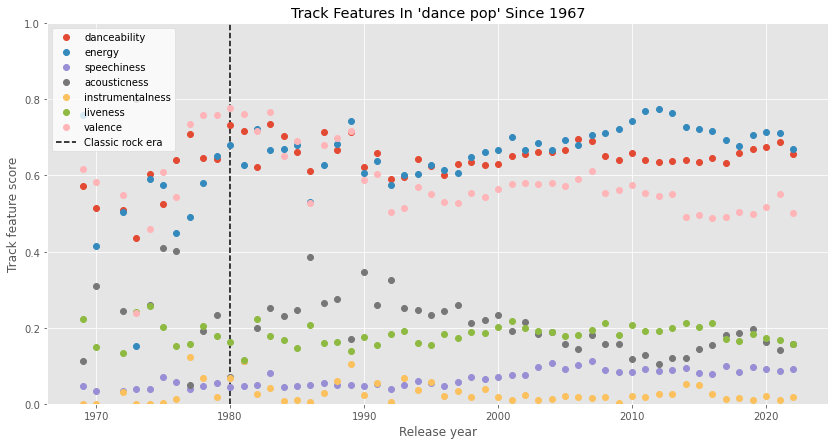

In [199]:
genre_track_features('dance pop')

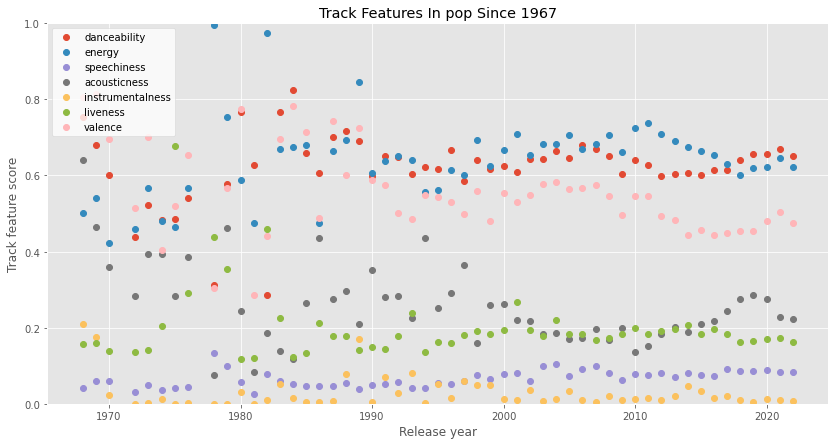

In [170]:
genre_track_features('pop')

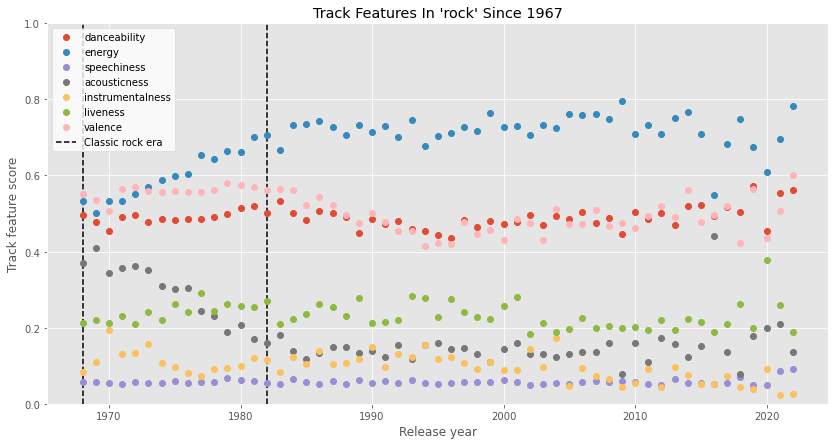

In [203]:
genre_track_features('rock')

In [241]:
rock_means['energy_diff'] = rock_means['energy'].diff()
rock_means['year'] = rock_means['release_date'].astype(str).astype(int)
rock_means['year']

classic_rock = rock_means[(rock_means['year'] > 1967) & (rock_means['year'] < 1982)]
print(len(classic_rock))
print('acousticness p-value: {}'.format(round(stats.ttest_1samp(classic_rock['acousticness'].diff()[1:],0, alternative='two-sided')[1], 3)))
print('energy p-value: {}'.format(round(stats.ttest_1samp(classic_rock['energy'].diff()[1:],0, alternative='two-sided')[1], 3)))
print('liveness p-value: {}'.format(round(stats.ttest_1samp(classic_rock['liveness'].diff()[1:],0, alternative='two-sided')[1], 3)))


14
acousticness p-value: 0.031
energy p-value: 0.006
liveness p-value: 0.629


danceability is stable over the time period:  
p-value = 0.71
energy is stable over the time period:  
p-value = 0.006
speechiness is stable over the time period:  
p-value = 0.81
acousticness is stable over the time period:  
p-value = 0.031
instrumentalness is stable over the time period:  
p-value = 0.958
liveness is stable over the time period:  
p-value = 0.629
valence is stable over the time period:  
p-value = 0.723


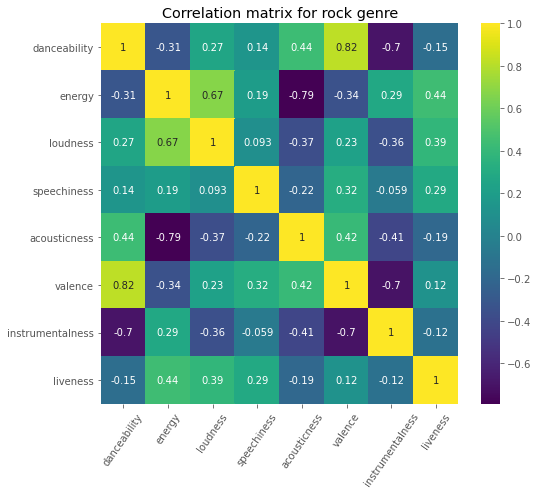

In [271]:
# create 1 sample test for feature changes

def feature_rate_test(genre, start=1967, end=1982):
    genre_df = features[features['genres'] == genre].copy()
    genre_df['release_date'] = pd.to_datetime(genre_df['release_date']).dt.to_period('Y')
    genre_df['year'] = genre_df['release_date'].astype('str').astype('int')
    
    genre_df = genre_df[(genre_df['year'] > start) & (genre_df['year'] < end)]
    
    genre_df = genre_df.groupby('year').mean()
    genre_diffs = genre_df[['danceability','energy','loudness','speechiness','acousticness','valence','instrumentalness','liveness']].diff()[1:]
    
    print('danceability is stable over the time period:  \np-value = {}'
          .format(round(stats.ttest_1samp(genre_diffs['danceability'], 0, alternative='two-sided')[1], 3)))
    print('energy is stable over the time period:  \np-value = {}'
          .format(round(stats.ttest_1samp(genre_diffs['energy'], 0, alternative='two-sided')[1], 3)))
    print('speechiness is stable over the time period:  \np-value = {}'
          .format(round(stats.ttest_1samp(genre_diffs['speechiness'], 0, alternative='two-sided')[1], 3)))
    print('acousticness is stable over the time period:  \np-value = {}'
          .format(round(stats.ttest_1samp(genre_diffs['acousticness'], 0, alternative='two-sided')[1], 3)))
    print('instrumentalness is stable over the time period:  \np-value = {}'
          .format(round(stats.ttest_1samp(genre_diffs['instrumentalness'], 0, alternative='two-sided')[1], 3)))
    print('liveness is stable over the time period:  \np-value = {}'
          .format(round(stats.ttest_1samp(genre_diffs['liveness'], 0, alternative='two-sided')[1], 3)))
    print('valence is stable over the time period:  \np-value = {}'
          .format(round(stats.ttest_1samp(genre_diffs['valence'], 0, alternative='two-sided')[1], 3)))

    sn.heatmap(genre_diffs.corr(), annot=True, cmap="viridis")
    plt.xticks(rotation=55)
    plt.title('Correlation matrix for {} genre'.format(genre))
    plt.savefig('/home/matt/dsi_galvanize/capstones/spotify/img/genre_correlation_heat.png', bbox_inches = "tight")

feature_rate_test('rock')

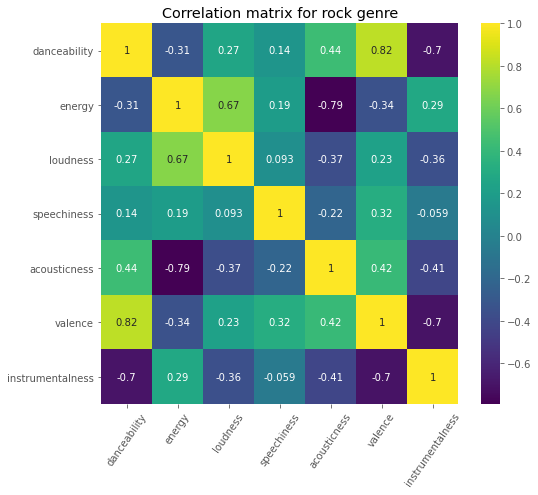

In [265]:
# rock correlation heatmap
# convert features to features.diff()
rock_diffs_corr = classic_rock[['danceability','energy','loudness','speechiness','acousticness','valence','instrumentalness']].diff()[1:].corr()

sn.heatmap(rock_diffs_corr, annot=True, cmap="viridis")
plt.xticks(rotation=55)
plt.title('Correlation matrix for rock genre')
plt.savefig('/home/matt/dsi_galvanize/capstones/spotify/img/rock_features_heat.png', bbox_inches = "tight")

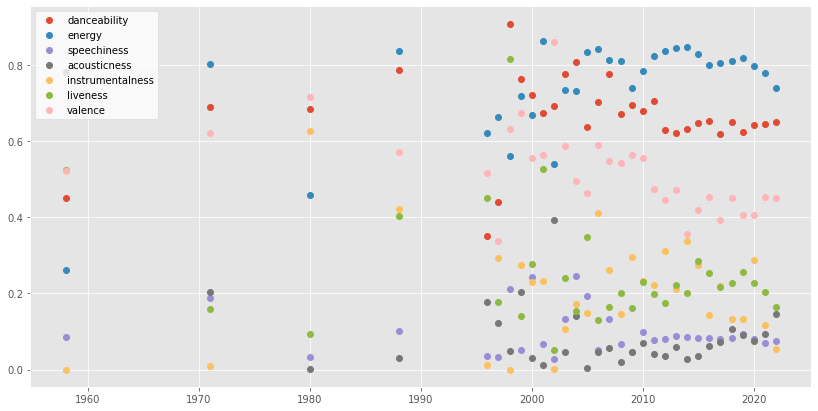

In [50]:
genre_track_features('electro house')

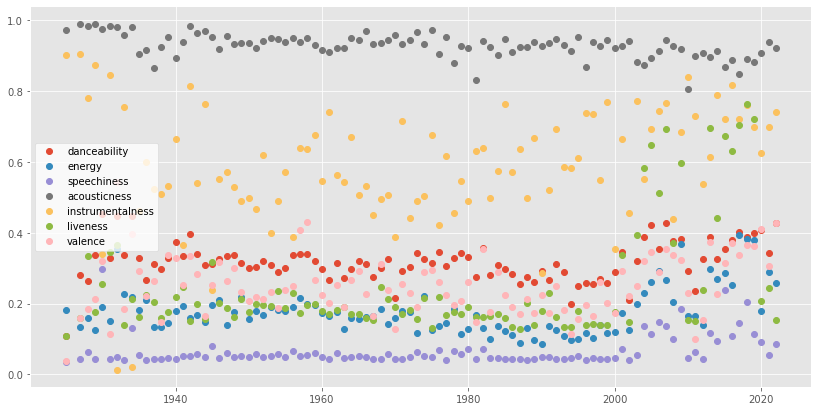

In [51]:
genre_track_features('classical performance')

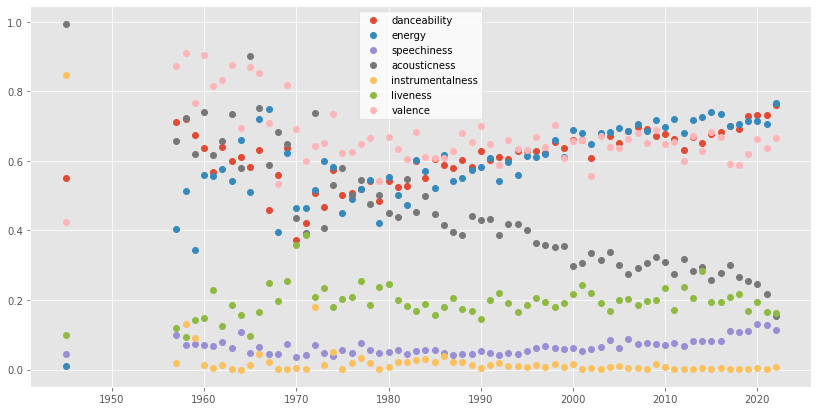

In [52]:
genre_track_features('latin')

In [53]:
def genre_track_features_df(genre):
    genre_features = features[features['genres'] == genre].copy()
    genre_features['genres'] = genre_features['genres'].str.strip("'")
    genre_features['release_date'] = pd.to_datetime(genre_features['release_date']).dt.to_period('Y')
    genre_means = genre_features.groupby('release_date').mean().reset_index()
    "{}_means".format(genre) = genre_means
    return "{}_means".format(genre)

SyntaxError: cannot assign to function call (<ipython-input-53-60b3fd452fc1>, line 6)

Ttest_1sampResult(statistic=-2.4516301488543317, pvalue=0.03050210072114848)

In [57]:
latin_means['acousticness'].diff()[1:]

NameError: name 'latin_means' is not defined

In [ ]:
stats.ttest_1samp(latin_means['acousticness'].diff()[1:],0)

In [ ]:
fig, ax = plt.subplots(figsize=(14,7))
ax.plot_date(classic_rock['release_date'], classic_rock['energy_diff'], label='energy_diff')
ax.plot_date(classic_rock['release_date'], classic_rock['acousticness'].diff(), label='acousticness_diff')

In [ ]:
# 1 sample t test

stats.ttest_1samp()

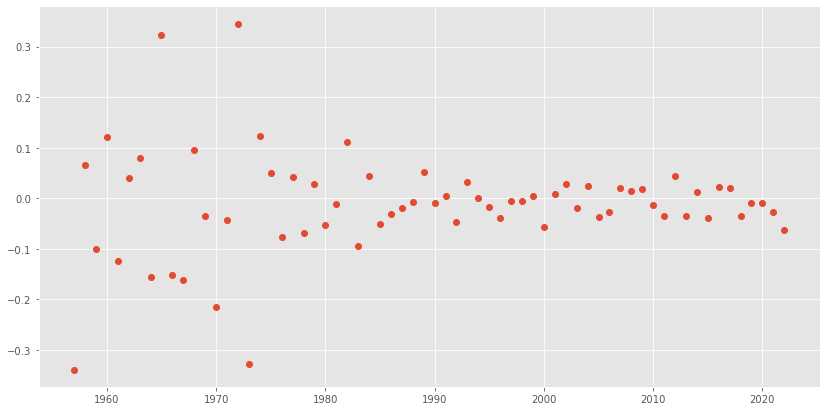

In [106]:
latin = features[features['genres'] == 'latin'].copy()
latin['release_date'] = pd.to_datetime(latin['release_date']).dt.to_period('Y')
latin_means = latin.groupby('release_date').mean().reset_index()
latin_means['acousticness_diff'] = latin_means['acousticness'].diff()
latin_means

fig, ax = plt.subplots(figsize=(14,7))
ax.plot_date(latin_means['release_date'], latin_means['acousticness_diff'], label='acousticness')

In [60]:
stats.ttest_ind(latin_means['acousticness'].diff()[1:], latin_means['energy'].diff()[1:])

# try assigning positive and negative values to 1 and -1

Ttest_indResult(statistic=-1.3548680068971315, pvalue=0.17780941841693948)

In [ ]:
# what songs are before 1950?

# rock_means[rock_means['release_date'] < pd.to_datetime(1950,format='%Y')];

In [107]:
rock_corr = rock_means[['danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence']].corr()
rock_corr

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
danceability,1.000000,0.158454,0.056466,0.317724,0.079821,0.128017,0.028955,0.507528
energy,0.158454,1.000000,0.807662,0.577538,-0.787853,-0.052949,-0.233280,-0.286074
loudness,0.056466,0.807662,1.000000,0.434480,-0.637369,-0.328730,-0.394713,-0.300473
speechiness,0.317724,0.577538,0.434480,1.000000,-0.366727,-0.023685,-0.151412,-0.099230
acousticness,0.079821,-0.787853,-0.637369,-0.366727,1.000000,0.149511,0.025266,0.415175
instrumentalness,0.128017,-0.052949,-0.328730,-0.023685,0.149511,1.000000,0.253331,-0.196644
liveness,0.028955,-0.233280,-0.394713,-0.151412,0.025266,0.253331,1.000000,-0.240233
valence,0.507528,-0.286074,-0.300473,-0.099230,0.415175,-0.196644,-0.240233,1.000000


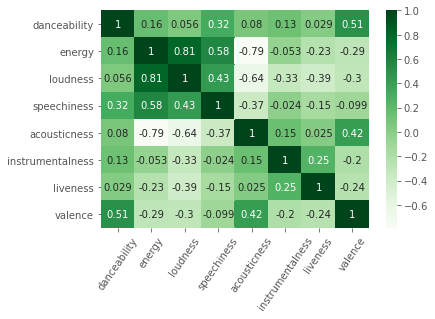

In [103]:
import seaborn as sn

sn.heatmap(rock_corr, annot=True, cmap="Greens")
plt.xticks(rotation=55)
plt.savefig('/home/matt/dsi_galvanize/capstones/spotify/img/rock_features_heat.png', bbox_inches = "tight")


In [ ]:
# calculate a rate of change, based on year over year differences

# first value would be 2nd value minus 1st value

change = mean[i+1] - mean[i]

In [104]:
def genre_track_features_rates(genre):
    genre_features = features[features['genres'] == genre].copy()
    genre_features['genres'] = genre_features['genres'].str.strip("'")
    genre_features['release_date'] = pd.to_datetime(genre_features['release_date']).dt.to_period('Y')
    genre_means = genre_features.groupby('release_date').mean().reset_index()
    genre_means

    fig, ax = plt.subplots(figsize=(14,7))
    ax.plot_date(genre_means['release_date'], genre_means['danceability'], label='danceability')
    ax.plot_date(genre_means['release_date'], genre_means['energy'], label='energy')
    ax.plot_date(genre_means['release_date'], genre_means['speechiness'], label='speechiness')
    ax.plot_date(genre_means['release_date'], genre_means['acousticness'], label='acousticness')
    ax.plot_date(genre_means['release_date'], genre_means['instrumentalness'], label='instrumentalness')
    ax.plot_date(genre_means['release_date'], genre_means['liveness'], label='liveness')
    ax.plot_date(genre_means['release_date'], genre_means['valence'], label='valence')
    ax.legend(facecolor='white')
    plt.savefig('/home/matt/dsi_galvanize/capstones/spotify/img/genre_features_scatter.png', bbox_inches = "tight")

In [64]:
genre_features = features[features['genres'] == 'rock'].copy()
genre_features['genres'] = genre_features['genres'].str.strip("'")
genre_features['release_date'] = pd.to_datetime(genre_features['release_date']).dt.to_period('Y')
genre_means = genre_features.groupby('release_date').mean().reset_index()


# for i in range(len(genre_means['danceability'])-1):
#     genre_means['danceability_rate'].append(genre_means['danceability'][i+1] - genre_means['danceability'][i])

In [65]:
stats.ttest_ind(genre_track_features_df('latin')['danceability'], genre_track_features_df('rock')['danceability'])

NameError: name 'genre_track_features_df' is not defined